In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns; sns.set()  # for plot styling

In [2]:
mt = pd.read_csv("BNG_hepatitis.csv")

In [3]:
mt.shape

(1000000, 7)

In [4]:
mt.head()

,AGE,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,Class
0,32.059452,1.000000,48.365665,51.718598,4.182311,74.038508,LIVE
1,41.229532,1.146760,63.522251,29.216549,4.030845,25.462303,LIVE
2,62.133896,1.000000,44.055037,42.183894,4.865354,36.232554,LIVE
3,48.209988,0.669207,131.126032,50.817332,3.902101,42.755563,DIE
4,32.699629,1.000000,123.179908,20.318702,4.075779,42.079171,LIVE


In [5]:
mt = mt.set_index("Class")
mt = mt.drop("DIE", axis=0)

In [6]:
mt.shape

(792183, 6)

In [7]:
mt.head()

,AGE,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME
Class,,,,,,
LIVE,32.059452,1.00000,48.365665,51.718598,4.182311,74.038508
LIVE,41.229532,1.14676,63.522251,29.216549,4.030845,25.462303
LIVE,62.133896,1.00000,44.055037,42.183894,4.865354,36.232554
LIVE,32.699629,1.00000,123.179908,20.318702,4.075779,42.079171
LIVE,33.949801,1.00000,111.616581,373.138182,3.321224,42.617551


In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#A more common way of speeding up a machine learning algorithm is by using Principal Component Analysis (PCA).
cluster = KMeans(n_clusters = 3)
mt["cluster"] = cluster.fit_predict(mt[mt.columns[2:]])

In [9]:
cols = mt.columns

In [10]:
#Principal Component separation to create a 2D picture
pca = PCA(n_components = 2)
mt['x']=abs(pca.fit_transform(mt[cols])[:,0])
mt['y']=abs(pca.fit_transform(mt[cols])[:,1])
mt = mt.reset_index()

In [11]:
mt.head()

,Class,AGE,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,cluster,x,y
0,LIVE,32.059452,1.00000,48.365665,51.718598,4.182311,74.038508,1,31.775585,56.941814
1,LIVE,41.229532,1.14676,63.522251,29.216549,4.030845,25.462303,1,54.150581,41.858990
2,LIVE,62.133896,1.00000,44.055037,42.183894,4.865354,36.232554,1,41.114236,61.259628
3,LIVE,32.699629,1.00000,123.179908,20.318702,4.075779,42.079171,1,63.499589,17.716765
4,LIVE,33.949801,1.00000,111.616581,373.138182,3.321224,42.617551,0,289.380653,8.379719


In [12]:
cls_clusters = mt[["Class","cluster", "x","y"]]

In [13]:
cls_clusters.tail()

,Class,cluster,x,y
792178,LIVE,2,34.570848,90.588271
792179,LIVE,1,56.592000,35.206468
792180,LIVE,1,65.687077,11.528042
792181,LIVE,0,293.323896,97.150149
792182,LIVE,1,24.763936,14.250369


In [14]:
from copy import deepcopy
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

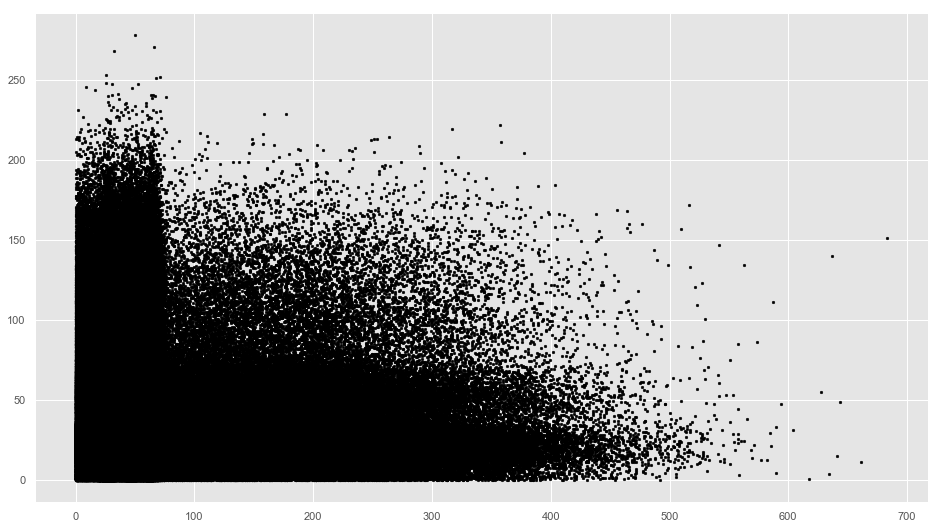

In [15]:
# Getting the values and plotting it
f1 = mt['x'].values
f2 = mt['y'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [16]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [17]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[  3.   4.]
 [150. 190.]
 [382. 254.]]


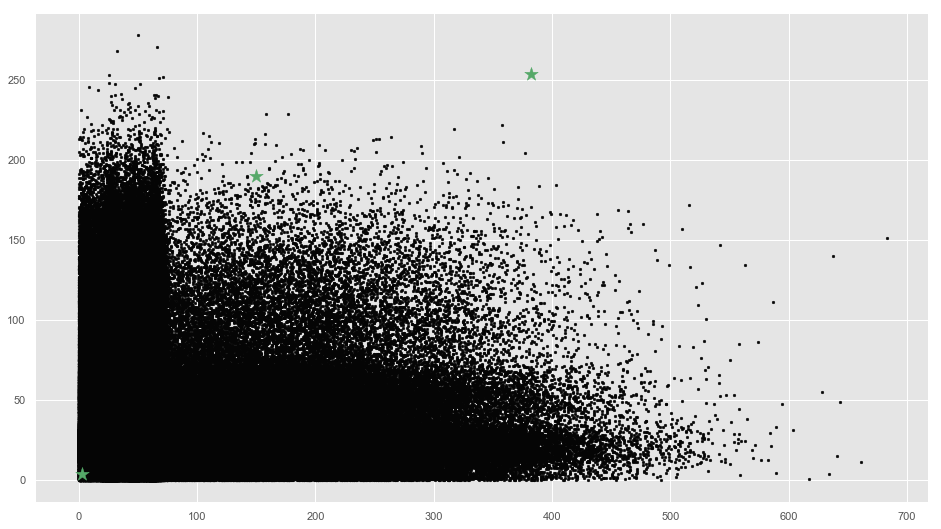

In [18]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [19]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

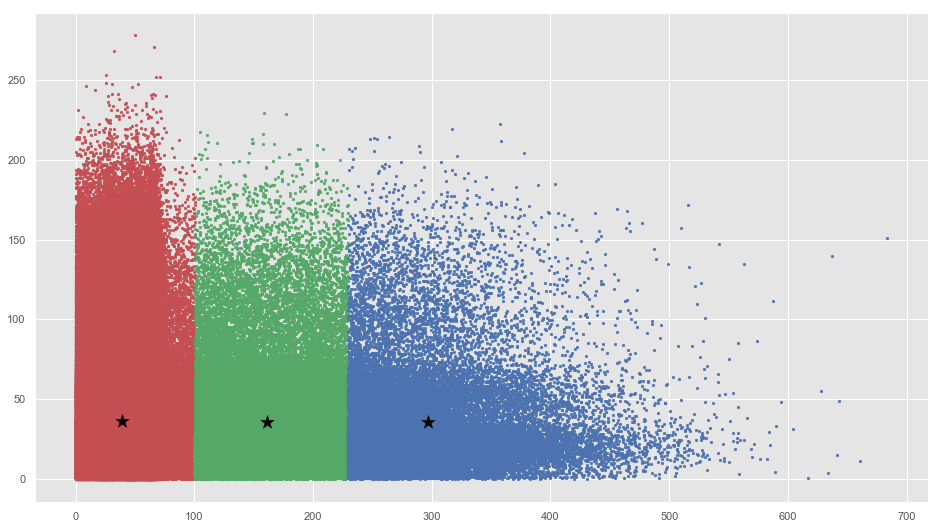

In [20]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')